In [5]:
import qiskit

In [34]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

service = QiskitRuntimeService(channel='ibm_quantum', token="e24b4e22ade3e7eacdc392189e913f47aa6765aaa22bf786d83b83bfa354de4b835b548a37e697f54d027b645bb78cb38ffb4e7e3ba16c25025d9fea9765f270")
# QiskitRuntimeService.save_account(channel='ibm_quantum', token="e24b4e22ade3e7eacdc392189e913f47aa6765aaa22bf786d83b83bfa354de4b835b548a37e697f54d027b645bb78cb38ffb4e7e3ba16c25025d9fea9765f270")

In [42]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.visualization import plot_histogram
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator

**Encoding step (d=3)**

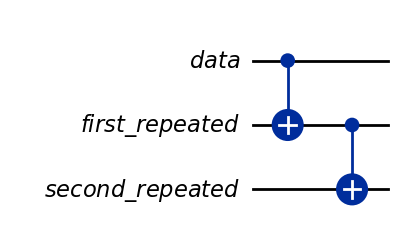

In [17]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
encoding_circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit)
encoding_circuit.cx(data_qubit[0], first_repeated_qubit[0])
encoding_circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
encoding_circuit.draw("mpl")

**Addition of ancilla bits to the circuit**

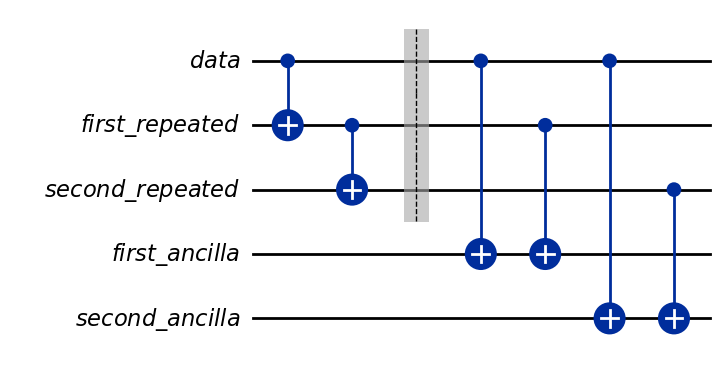

In [23]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla)
circuit.cx(data_qubit[0], first_repeated_qubit[0])
circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
circuit.barrier([0, 1, 2])
circuit.cx(data_qubit[0], first_ancilla[0])
circuit.cx(first_repeated_qubit[0], first_ancilla[0])
circuit.cx(data_qubit[0], second_ancilla[0])
circuit.cx(second_repeated_qubit[0], second_ancilla[0])
circuit.draw("mpl")

**Adding measurements to ancilla bits**

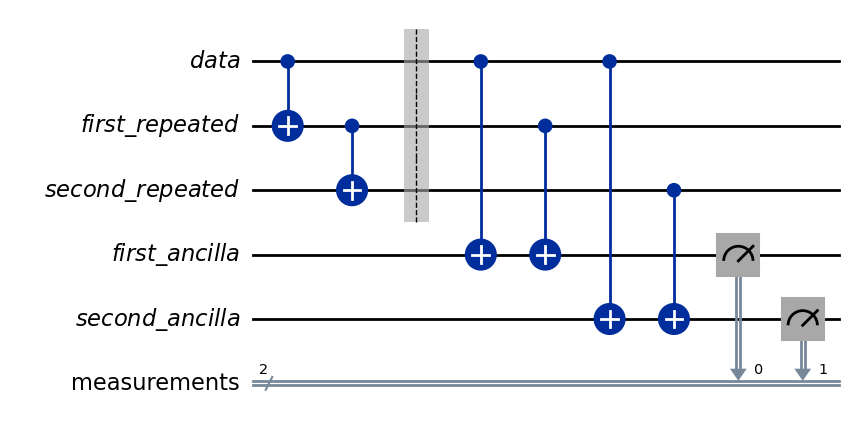

In [ ]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
measurements = ClassicalRegister(2, "measurements")
circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements)
circuit.cx(data_qubit[0], first_repeated_qubit[0])
circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
circuit.barrier([0, 1, 2])
circuit.cx(data_qubit[0], first_ancilla[0])
circuit.cx(first_repeated_qubit[0], first_ancilla[0])
circuit.cx(data_qubit[0], second_ancilla[0])
circuit.cx(second_repeated_qubit[0], second_ancilla[0])
circuit.measure([first_ancilla[0], second_ancilla[0]], [measurements[0], measurements[1]])
circuit.draw("mpl")

**Apply correction**

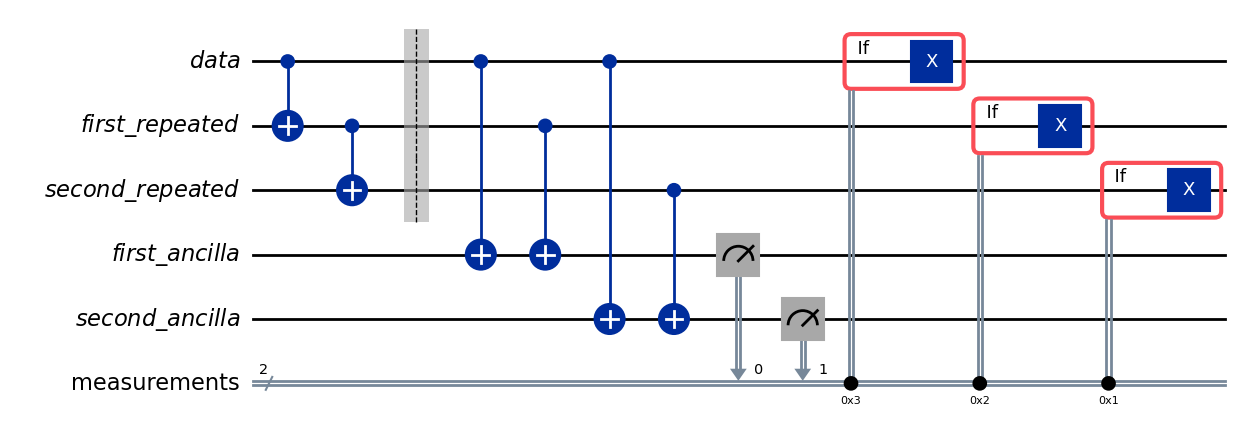

In [63]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
measurements = ClassicalRegister(2, name="measurements")
circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements)
circuit.cx(data_qubit[0], first_repeated_qubit[0])
circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
circuit.barrier([0, 1, 2])
circuit.cx(data_qubit[0], first_ancilla[0])
circuit.cx(first_repeated_qubit[0], first_ancilla[0])
circuit.cx(data_qubit[0], second_ancilla[0])
circuit.cx(second_repeated_qubit[0], second_ancilla[0])
circuit.measure([first_ancilla[0], second_ancilla[0]], [measurements[0], measurements[1]])
with circuit.if_test((measurements, 3)):
    circuit.x(data_qubit[0])
with circuit.if_test((measurements, 2)):
    circuit.x(first_repeated_qubit[0])
with circuit.if_test((measurements, 1)):
    circuit.x(second_repeated_qubit[0])
circuit.draw("mpl")

**Adding final measurements of qubits**

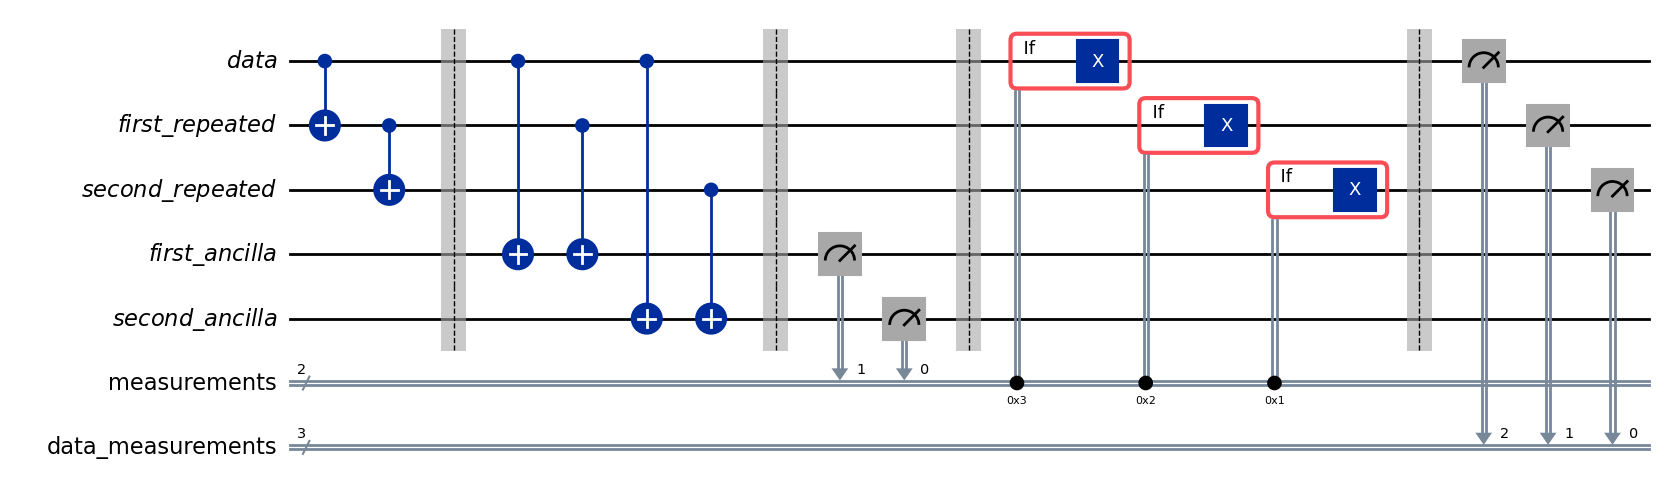

In [102]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
measurements = ClassicalRegister(2, "measurements")
data_measurements = ClassicalRegister(3, "data_measurements")
circuit = QuantumCircuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit.cx(data_qubit[0], first_repeated_qubit[0])
circuit.cx(first_repeated_qubit[0], second_repeated_qubit[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.cx(data_qubit[0], first_ancilla[0])
circuit.cx(first_repeated_qubit[0], first_ancilla[0])
circuit.cx(data_qubit[0], second_ancilla[0])
circuit.cx(second_repeated_qubit[0], second_ancilla[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.measure([first_ancilla[0], second_ancilla[0]], [measurements[1], measurements[0]])
circuit.barrier([0, 1, 2, 3, 4])
with circuit.if_test((measurements, 3)):
    circuit.x(data_qubit[0])
with circuit.if_test((measurements, 2)):
    circuit.x(first_repeated_qubit[0])
with circuit.if_test((measurements, 1)):
    circuit.x(second_repeated_qubit[0])
circuit.barrier([0, 1, 2, 3, 4])
circuit.measure([data_qubit[0], first_repeated_qubit[0], second_repeated_qubit[0]], [data_measurements[2], data_measurements[1], data_measurements[0]])
circuit.draw("mpl")

**Separate code into functions**

In [125]:
class repetition_code_circuit:
    def __init__(self, data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements):
        self.data_qubit = data_qubit
        self.first_repeated_qubit = first_repeated_qubit
        self.second_repeated_qubit = second_repeated_qubit
        self.first_ancilla = first_ancilla
        self.second_ancilla = second_ancilla
        self.measurements = measurements
        self.data_measurements = data_measurements
        self.circuit = QuantumCircuit(self.data_qubit, self.first_repeated_qubit, self.second_repeated_qubit, self.first_ancilla, self.second_ancilla, self.measurements, self.data_measurements)

    def apply_encoding(self, noise_index=None):
        qubits = [self.data_qubit, self.first_repeated_qubit, self.second_repeated_qubit]
        self.circuit.cx(self.data_qubit[0], self.first_repeated_qubit[0])
        self.circuit.cx(self.first_repeated_qubit[0], self.second_repeated_qubit[0])
        if noise_index is not None:
            self.circuit.x(qubits[noise_index])
        self.circuit.barrier([0, 1, 2, 3, 4])
    
    def apply_detection(self):
        self.circuit.cx(self.data_qubit[0], self.first_ancilla[0])
        self.circuit.cx(self.first_repeated_qubit[0], self.first_ancilla[0])
        self.circuit.cx(self.data_qubit[0], self.second_ancilla[0])
        self.circuit.cx(self.second_repeated_qubit[0], self.second_ancilla[0])
        self.circuit.barrier([0, 1, 2, 3, 4])
    
    def apply_detection_measurements(self):
        self.circuit.measure([self.first_ancilla[0], self.second_ancilla[0]], [self.measurements[1], self.measurements[0]])
        self.circuit.barrier([0, 1, 2, 3, 4])    
    
    def apply_error_correction(self):
        with self.circuit.if_test((self.measurements, 3)):
            self.circuit.x(self.data_qubit[0])
        with self.circuit.if_test((self.measurements, 2)):
            self.circuit.x(self.first_repeated_qubit[0])
        with self.circuit.if_test((self.measurements, 1)):
            self.circuit.x(self.second_repeated_qubit[0])
        self.circuit.barrier([0, 1, 2, 3, 4])
    
    def apply_final_measurement(self):
        self.circuit.measure([self.data_qubit[0], self.first_repeated_qubit[0], self.second_repeated_qubit[0]], [self.data_measurements[2], self.data_measurements[1], self.data_measurements[0]])

In [118]:
data_qubit = QuantumRegister(1, 'data')
first_repeated_qubit = QuantumRegister(1, 'first_repeated')
second_repeated_qubit = QuantumRegister(1, 'second_repeated')
first_ancilla = QuantumRegister(1, 'first_ancilla')
second_ancilla = QuantumRegister(1, 'second_ancilla')
measurements = ClassicalRegister(2, "measurements")
data_measurements = ClassicalRegister(3, "data_measurements")

**Teesting circuits**

In [126]:
circuit_without_noise = repetition_code_circuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit_without_noise.apply_encoding()
circuit_without_noise.apply_detection()
circuit_without_noise.apply_detection_measurements()
circuit_without_noise.apply_error_correction()
circuit_without_noise.apply_final_measurement()

circuit_with_noise_at_first_qubit = repetition_code_circuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit_with_noise_at_first_qubit.apply_encoding(noise_index=0)
circuit_with_noise_at_first_qubit.apply_detection()
circuit_with_noise_at_first_qubit.apply_detection_measurements()
circuit_with_noise_at_first_qubit.apply_error_correction()
circuit_with_noise_at_first_qubit.apply_final_measurement()

circuit_with_noise_at_second_qubit = repetition_code_circuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit_with_noise_at_second_qubit.apply_encoding(noise_index=1)
circuit_with_noise_at_second_qubit.apply_detection()
circuit_with_noise_at_second_qubit.apply_detection_measurements()
circuit_with_noise_at_second_qubit.apply_error_correction()
circuit_with_noise_at_second_qubit.apply_final_measurement()

circuit_with_noise_at_third_qubit = repetition_code_circuit(data_qubit, first_repeated_qubit, second_repeated_qubit, first_ancilla, second_ancilla, measurements, data_measurements)
circuit_with_noise_at_third_qubit.apply_encoding(noise_index=2)
circuit_with_noise_at_third_qubit.apply_detection()
circuit_with_noise_at_third_qubit.apply_detection_measurements()
circuit_with_noise_at_third_qubit.apply_error_correction()
circuit_with_noise_at_third_qubit.apply_final_measurement()

**No noise**

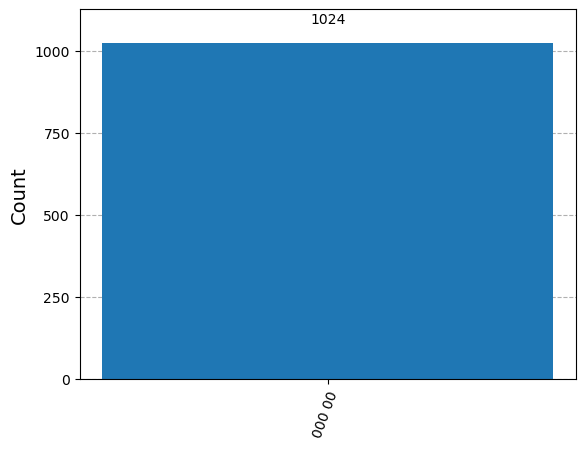

In [127]:
backend = service.least_busy(operational=True, simulator=False)
# sampler = Sampler(backend)
# encoding_circuit.measure_all()
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_without_noise.circuit)
# physical.draw("mpl")
# job = sampler.run([encoding_circuit], shots=1000)
result = simulator.run(physical).result()
counts = result.get_counts(physical)
plot_histogram(counts)

**Noise at first qubit**

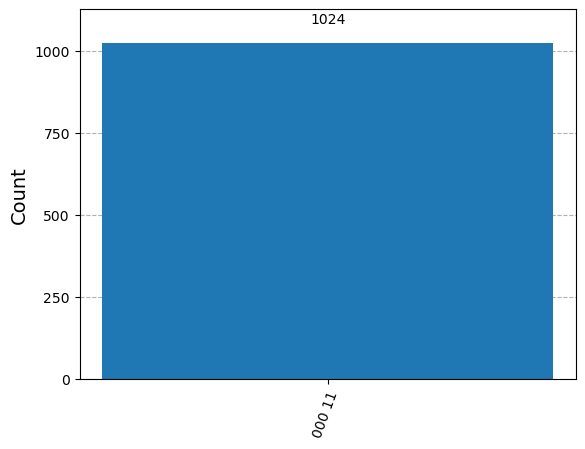

In [128]:
backend = service.least_busy(operational=True, simulator=False)
# sampler = Sampler(backend)
# encoding_circuit.measure_all()
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_first_qubit.circuit)
# physical.draw("mpl")
# job = sampler.run([encoding_circuit], shots=1000)
result = simulator.run(physical).result()
counts = result.get_counts(physical)
plot_histogram(counts)

**Noise at second qubit**

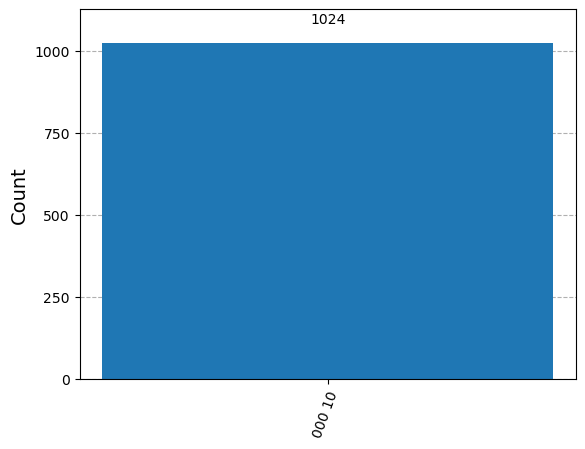

In [129]:
backend = service.least_busy(operational=True, simulator=False)
# sampler = Sampler(backend)
# encoding_circuit.measure_all()
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_second_qubit.circuit)
# physical.draw("mpl")
# job = sampler.run([encoding_circuit], shots=1000)
result = simulator.run(physical).result()
counts = result.get_counts(physical)
plot_histogram(counts)

**Noise at third qubit**

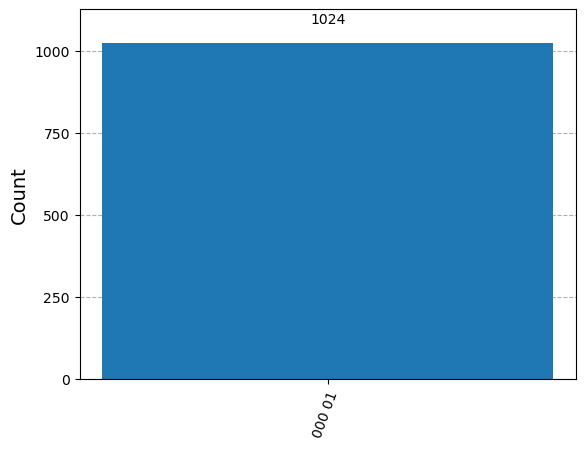

In [130]:
backend = service.least_busy(operational=True, simulator=False)
# sampler = Sampler(backend)
# encoding_circuit.measure_all()
simulator = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_third_qubit.circuit)
# physical.draw("mpl")
# job = sampler.run([encoding_circuit], shots=1000)
result = simulator.run(physical).result()
counts = result.get_counts(physical)
plot_histogram(counts)

**Running in actual machines**

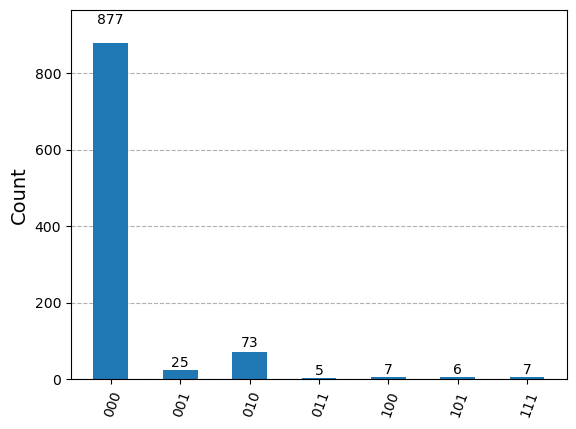

In [134]:
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_without_noise.circuit)
job = sampler.run([physical], shots=1000)
result = job.result()[0]
counts = result.data.data_measurements.get_counts()
plot_histogram(counts)

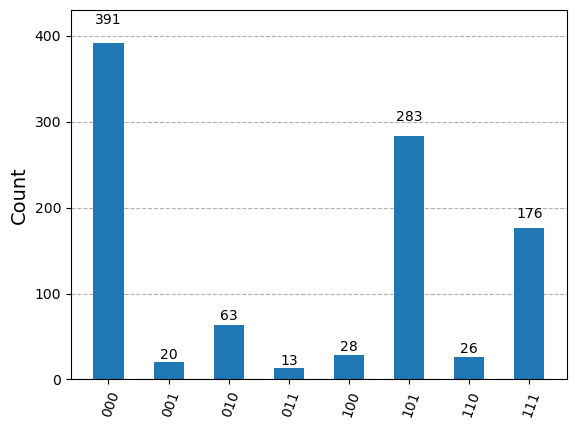

In [135]:
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_first_qubit.circuit)
job = sampler.run([physical], shots=1000)
result = job.result()[0]
counts = result.data.data_measurements.get_counts()
plot_histogram(counts)

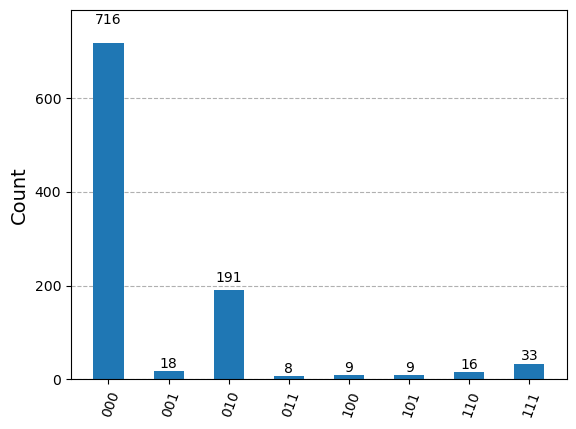

In [136]:
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_second_qubit.circuit)
job = sampler.run([physical], shots=1000)
result = job.result()[0]
counts = result.data.data_measurements.get_counts()
plot_histogram(counts)

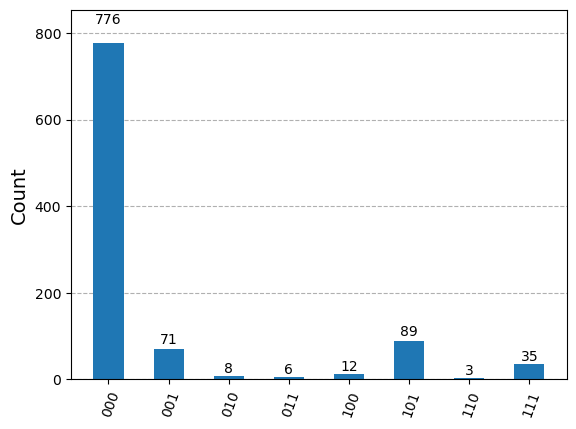

In [137]:
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)
pm = generate_preset_pass_manager(backend=backend)
physical = pm.run(circuit_with_noise_at_third_qubit.circuit)
job = sampler.run([physical], shots=1000)
result = job.result()[0]
counts = result.data.data_measurements.get_counts()
plot_histogram(counts)